# Importation des bibliothèques

In [4]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt



#Génération des données aléatoires de taille 1000

In [5]:
np.random.seed(0)  # Setting the seed for reproducibility
data = np.random.rand(1000) # Generating 1000 random numbers between 0 and 1

# Definition des paramètres de l'histogramme

In [6]:
density = True

# Le nombre d'intervalles à tester

In [7]:
num_bins_values = [10, 20, 30, 40]

# Calcul d'erreur d'estimation

In [8]:
def error(density_real, histogram):
    interpolated_density_real = np.interp(histogram, np.linspace(0, 1, len(density_real)), density_real)
    return np.sum(np.abs(interpolated_density_real - histogram))

# Boucler sur les intervalles

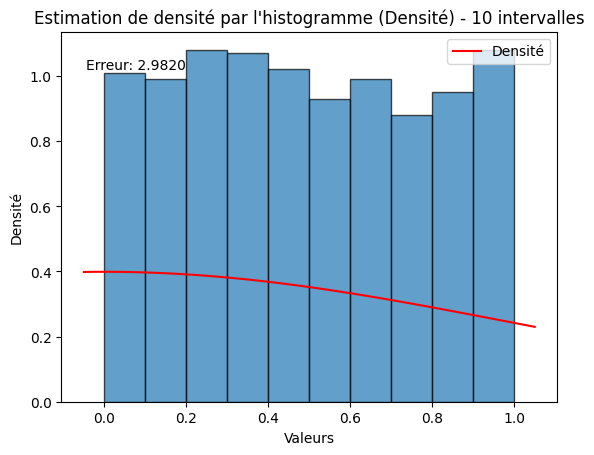

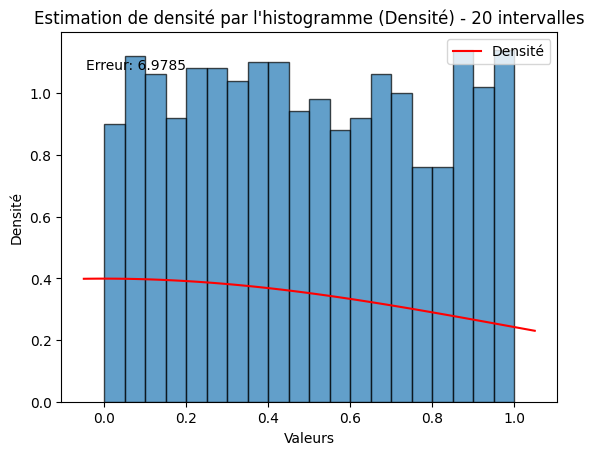

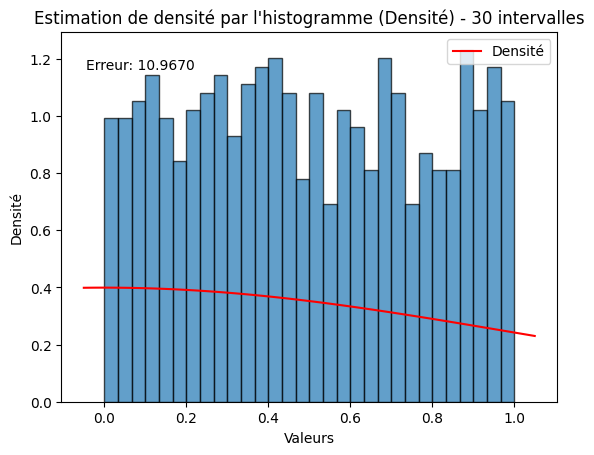

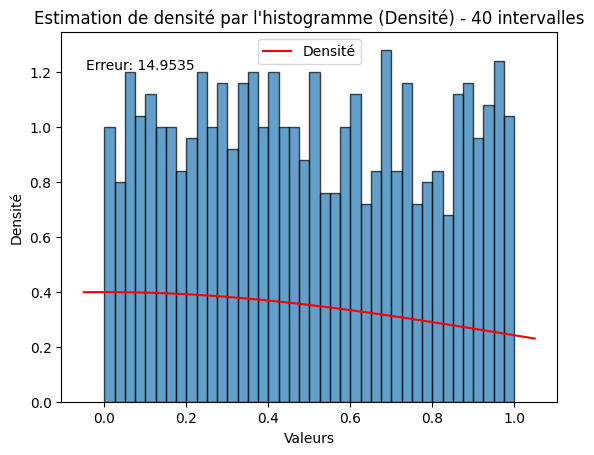

In [9]:
for num_bins in num_bins_values:
    # Creation of the histogram
    counts, bins, _ = plt.hist(data, bins=num_bins, density=density, edgecolor='black', alpha=0.7)

    # Calculation of the density
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    density_real = norm.pdf(x)

    # Display the density curve
    plt.plot(x, density_real, 'r', label='Densité')
    plt.xlabel('Valeurs')

    if density:
        plt.ylabel('Densité')
        plt.title(f'Estimation de densité par l\'histogramme (Densité) - {num_bins} intervalles')
    else:
        plt.ylabel('Nombre d\'observations')
        plt.title(f'Estimation de densité par l\'histogramme (Fréquence) - {num_bins} intervalles')


    # Calculate and display the error
    histogram = counts / np.sum(counts)  # Normalize the histogram
    error_ = error(density_real, histogram)
    plt.text(0.05, 0.9, f'Erreur: {error_:.4f}', transform=plt.gca().transAxes)

    plt.legend()
    plt.show()

# Importation des bibliothèques:


In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=1000)

#Définition de la fonction du noyau gaussien

In [11]:
def kernel_estimation(data, x, h):
    n = len(data)
    k_sum = 0
    for i in range(n):
        u = (x - data[i]) / h
        k = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)
        k_sum += k
    return (1 / (n * h)) * k_sum

#  Définition de la paramétre de lissage et calcule de densité

##Définition des paramètres de l'estimateur à noyau, fenetre de lissage:


In [12]:
h = 0.1
x_values = np.linspace(-5, 5, 100)  # Values of x for which we will estimate the density

##Calcul de l'estimateur de densité pour chaque valeur de x:

In [13]:
density_estimation = [kernel_estimation(data, x, h) for x in x_values]

##Densité rééelle d'une distribution normale


In [14]:
true_density = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x_values**2)

## Affichage du résultat:


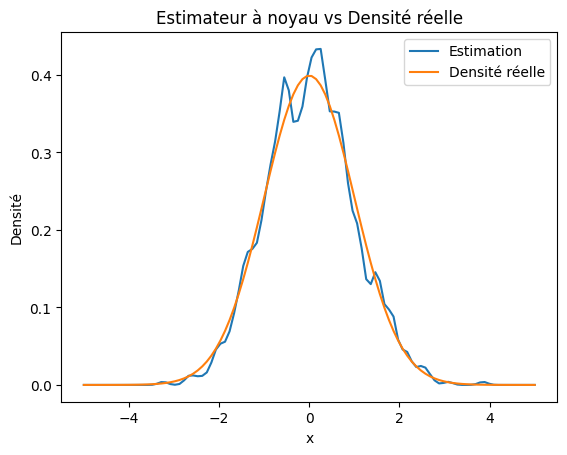

In [15]:
plt.plot(x_values, density_estimation, label="Estimation")
plt.plot(x_values, true_density, label="Densité réelle")
plt.xlabel("x")
plt.ylabel("Densité")
plt.title("Estimateur à noyau vs Densité réelle")
plt.legend()
plt.show()

## Fonctions de variance et de biais

In [25]:
import numpy as np

def true_function(x):
    """Calculates the true density of a standard normal distribution at a given point x."""
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

In [26]:
def estimate_function(x, data):
  """Estimates the density at a given point x using kernel density estimation."""
  h = 0.1 # Using your previous bandwidth value, but you can adjust this
  return kernel_estimation(data, x, h)

## Definition de la fonction biais

In [27]:
def calculate_bias_squared(x, data):
    true_value = true_function(x)
    estimated_value = estimate_function(x, data)
    bias_squared = (true_value - estimated_value)**2
    return bias_squared

##Calcul de la variance

In [31]:
def calculate_variance(x, data, num_samples=100, sample_size=100):
    """
    Calculates the variance of the kernel density estimate at a given point x.

    Args:
        x: The point at which to evaluate the variance.
        data: The original dataset.
        num_samples: The number of bootstrap samples to generate.
        sample_size: The size of each bootstrap sample.

    Returns:
        The variance of the kernel density estimate at x.
    """
    estimated_values = []
    for _ in range(num_samples):
        # Generate a bootstrap sample
        sample = np.random.choice(data, size=sample_size, replace=True)
        estimated_values.append(estimate_function(x, sample))

    mean_estimated_value = np.mean(estimated_values)
    variance = np.mean((estimated_values - mean_estimated_value)**2)
    return variance

#Calcul de l’erreur quadratique ponctuelle

## Point d'evaluation de la fonction

In [17]:
x = 2

## Affichage du résultat:

In [32]:
bias_squared = calculate_bias_squared(x, data)
variance = calculate_variance(x, data)  # Or use calculate_variance_bootstrap
quadratic_risk = bias_squared + variance

print("Biais au carré :", bias_squared)
print("Variance :", variance)
print("Risque quadratique ponctuel :", quadratic_risk)

Biais au carré : 4.853475207247978e-06
Variance : 0.0012409508600509634
Risque quadratique ponctuel : 0.0012458043352582113


In [23]:
h_values = [0.05, 0.1, 0.2, 0.5]
x_values = np.linspace(-5, 5, 100)

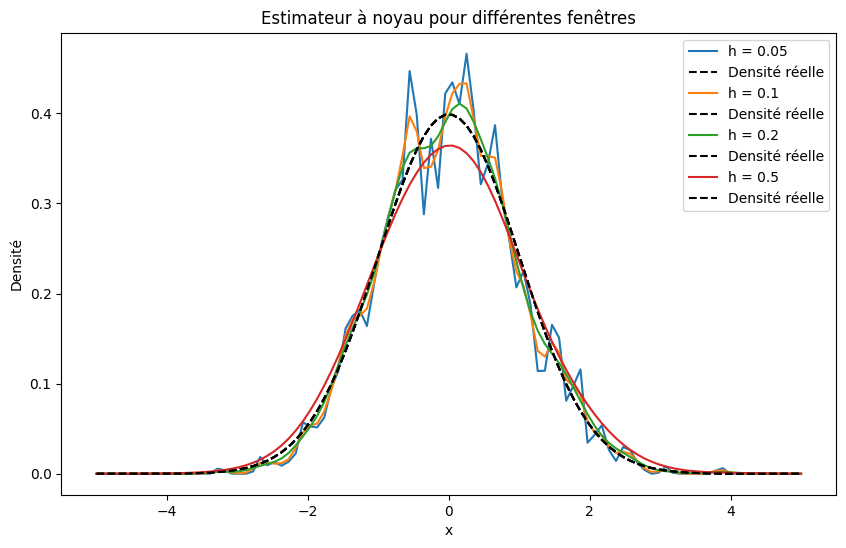

In [24]:
plt.figure(figsize=(10, 6))
for h in h_values:
    density_estimation = [kernel_estimation(data, x, h) for x in x_values]
    true_density = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x_values**2)
    plt.plot(x_values, density_estimation, label=f"h = {h}")
    plt.plot(x_values, true_density, label="Densité réelle", linestyle="--", color="black")

plt.xlabel("x")
plt.ylabel("Densité")
plt.title("Estimateur à noyau pour différentes fenêtres")
plt.legend()
plt.show()